# VISUAL QUESTION ANSWERING

##What is VQA?

A VQA system takes an image and a free-form natural language question about the image as input (e.g.  “Is the boy jumping?”), and produces a natural language answer as its output (e.g. “yes”). Unlike image
captioning, answering questions requires the ability to identify specific details in the image

in this Notebook , We address the problem of answering binary
questions about images.



## What we're going to cover

Specifically, we're going to go through the follow with TensorFlow:

- Getting a dataset to work with
-  Visualizing  data

# **Step 0** : Get the data

VQA is a new dataset containing open-ended questions about images. These questions require an understanding of vision, language and commonsense knowledge to answer.

The data that we're going to work with are from the [visualqa dataset](https://visualqa.org/index.html), a collection of abstract scenes , questions and annotations .

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


### unzip files

In [ ]:
import zipfile

def unzip_data(filename):
  """
  Unzips filename into the current working directory.

  Args:
    filename (str): a filepath to a target zip folder to be unzipped.
  """
  zip_ref = zipfile.ZipFile(filename, "r")
  zip_ref.extractall()
  zip_ref.close()

In [ ]:
# Unzip data
# unzip_data("/content/gdrive/MyDrive/VQA/Annotations_Binary_Train2017_abstract_v002.zip")
# unzip_data("/content/gdrive/MyDrive/VQA/Annotations_Binary_Val2017_abstract_v002.zip")

# unzip_data("/content/gdrive/MyDrive/VQA/Questions_Binary_Train2017_abstract_v002.zip")
# unzip_data("/content/gdrive/MyDrive/VQA/Questions_Binary_Val2017_abstract_v002.zip")

unzip_data("/content/gdrive/MyDrive/VQA/scene_img_abstract_v002_binary_train2017.zip")
unzip_data("/content/gdrive/MyDrive/VQA/scene_img_abstract_v002_binary_val2017_2.zip")

# unzip_data("/content/gdrive/MyDrive/VQA/scene_json_abstract_v002_binary_train2017.zip")
# unzip_data("/content/gdrive/MyDrive/VQA/scene_json_abstract_v002_binary_val2017_3.zip")

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data. This usually means plenty of visualizing and folder scanning to understand the data we're working with.





In [ ]:
import os

def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.

  Args:
    dir_path (str): target directory
  
  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
    

In [ ]:
walk_through_dir("/content/scene_img_abstract_v002_train2017")

There are 0 directories and 20630 images in '/content/scene_img_abstract_v002_train2017'.


In [ ]:
walk_through_dir("/content/scene_img_abstract_v002_val2017")

There are 0 directories and 10696 images in '/content/scene_img_abstract_v002_val2017'.


In [ ]:
walk_through_dir("/content/scene_json_abstract_v002_binary_train2017")

There are 1 directories and 0 images in '/content/scene_json_abstract_v002_binary_train2017'.
There are 0 directories and 20629 images in '/content/scene_json_abstract_v002_binary_train2017/scene_composition_abstract_v002_binary_train2017'.


In [ ]:
walk_through_dir("/content/scene_json_abstract_v002_binary_val2017")

There are 1 directories and 0 images in '/content/scene_json_abstract_v002_binary_val2017'.
There are 0 directories and 10696 images in '/content/scene_json_abstract_v002_binary_val2017/scene_composition_abstract_v002_binary_val2017'.


In [ ]:
import json

with open('/content/OpenEnded_abstract_v002_train2017_questions.json', 'r') as f:
  train_question_dict = json.load(f)

with open('/content/OpenEnded_abstract_v002_val2017_questions.json', 'r') as f:
  val_question_dict = json.load(f)

with open('/content/abstract_v002_train2017_annotations.json', 'r') as f:
  train_annotation_dict = json.load(f)

with open('/content/abstract_v002_val2017_annotations.json', 'r') as f:
  val_annotation_dict = json.load(f)


##  Visualizing Annotation Dataset

In [ ]:
{k: v for i, (k, v) in enumerate(val_annotation_dict.items()) }

{'annotations': [{'answer_type': 'yes/no',
   'answers': [{'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 1},
    {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 2},
    {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 3},
    {'answer': 'yes', 'answer_confidence': 'maybe', 'answer_id': 4},
    {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 5},
    {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 6},
    {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 7},
    {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 8},
    {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 9},
    {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 10}],
   'image_id': 28940,
   'multiple_choice_answer': 'yes',
   'question_id': 289402,
   'question_type': 'is it'},
  {'answer_type': 'yes/no',
   'answers': [{'answer': 'no', 'answer_confidence': 'maybe', 'answer_id': 1},
    {'answer': 'yes', 'answer_confidence': 'yes', '

And what about the total number of samples we have?

In [ ]:
len(train_annotation_dict["annotations"]) , len(val_annotation_dict["annotations"]) 

(22055, 11328)

In [ ]:
train_annotation_dict["annotations"]  # list of dictionary

[{'answer_type': 'yes/no',
  'answers': [{'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 1},
   {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 2},
   {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 3},
   {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 4},
   {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 5},
   {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 6},
   {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 7},
   {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 8},
   {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 9},
   {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 10}],
  'image_id': 87,
  'multiple_choice_answer': 'yes',
  'question_id': 870,
  'question_type': 'is the boy'},
 {'answer_type': 'yes/no',
  'answers': [{'answer': 'no', 'answer_id': 1},
   {'answer': 'no', 'answer_id': 2},
   {'answer': 'no', 'answer_id': 3},
   {'answer': 'no', 'answer_id': 4},
   {'a

###an example of a annotation dictionary

In [ ]:
annotation_dict_sample=train_annotation_dict["annotations"][0]
annotation_dict_sample

{'answer_type': 'yes/no',
 'answers': [{'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 1},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 2},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 3},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 4},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 5},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 6},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 7},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 8},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 9},
  {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 10}],
 'image_id': 87,
 'multiple_choice_answer': 'yes',
 'question_id': 870,
 'question_type': 'is the boy'}

In [ ]:
answer_type=annotation_dict_sample["answer_type"] 
answer_type


'yes/no'

In [ ]:
img_id=annotation_dict_sample["image_id"] 
img_id

87

##  Visualizing Question Dataset

In [ ]:
{k: v for i, (k, v) in enumerate(train_question_dict.items()) }

{'data_subtype': 'train2017',
 'data_type': 'abstract_v002',
 'info': {'contributor': 'VQA Team',
  'date_created': '2017-03-09 14:27:27',
  'description': 'This is Balanced Binary Abstract Scenes VQA dataset.',
  'url': 'http://visualqa.org',
  'version': '1.0',
  'year': '2017'},
 'license': {'name': 'Creative Commons Attribution 4.0 International License',
  'url': 'http://creativecommons.org/licenses/by/4.0/'},
 'questions': [{'image_id': 87,
   'question': 'Is the boy having wine?',
   'question_id': 870},
  {'image_id': 900000870,
   'question': 'Is the boy having wine?',
   'question_id': 900000870},
  {'image_id': 14962, 'question': 'Is it night time?', 'question_id': 149620},
  {'image_id': 900149620,
   'question': 'Is it night time?',
   'question_id': 900149620},
  {'image_id': 8277,
   'question': 'Is the boy hanging from monkey bars?',
   'question_id': 82771},
  {'image_id': 900082771,
   'question': 'Is the boy hanging from monkey bars?',
   'question_id': 900082771},
 

In [ ]:
{k: v for i, (k, v) in enumerate(train_question_dict.items()) if k=="questions" }

{'questions': [{'image_id': 87,
   'question': 'Is the boy having wine?',
   'question_id': 870},
  {'image_id': 900000870,
   'question': 'Is the boy having wine?',
   'question_id': 900000870},
  {'image_id': 14962, 'question': 'Is it night time?', 'question_id': 149620},
  {'image_id': 900149620,
   'question': 'Is it night time?',
   'question_id': 900149620},
  {'image_id': 8277,
   'question': 'Is the boy hanging from monkey bars?',
   'question_id': 82771},
  {'image_id': 900082771,
   'question': 'Is the boy hanging from monkey bars?',
   'question_id': 900082771},
  {'image_id': 15675,
   'question': 'Is there room on the table for anything else?',
   'question_id': 156750},
  {'image_id': 900156750,
   'question': 'Is there room on the table for anything else?',
   'question_id': 900156750},
  {'image_id': 10466,
   'question': 'Is the boy dangerously close to the fire?',
   'question_id': 104662},
  {'image_id': 900104662,
   'question': 'Is the boy dangerously close to the 

###an example of a question dictionary

In [ ]:
question_dict_sample=train_question_dict["questions"][0]
question_dict_sample

{'image_id': 87, 'question': 'Is the boy having wine?', 'question_id': 870}

In [ ]:
question_dict_sample["image_id"]

87

In [ ]:
question=question_dict_sample["question"]
question

'Is the boy having wine?'

In [ ]:
# we have same question for 2 opposite scences  ---> complementary
for item in train_question_dict["questions"] :
  if item["question"]==question :
    print(item)
    

{'image_id': 87, 'question': 'Is the boy having wine?', 'question_id': 870}
{'image_id': 900000870, 'question': 'Is the boy having wine?', 'question_id': 900000870}


We can notice that we have the same question for 2 different scences .

This is because  we use abstract scenes to collect a balanced dataset containing pairs of complementary scenes: the two scenes have opposite answers to the same question, while being visually as similar as possible.
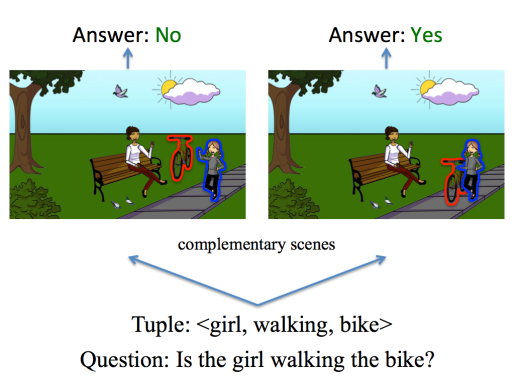

### VQA DATASET ANALYSIS:
 we provide an analysis of the questions and answers in the VQA train dataset.


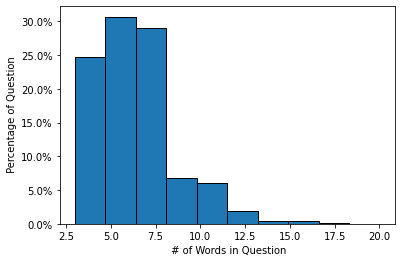

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib.ticker import PercentFormatter
import numpy as np

length=[]

for item in train_question_dict["questions"] :
  length.append(len(item["question"].split()))


myplot = plt.hist(length,weights=np.ones(len(length)) / len(length),ec='black')
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.xlabel(' # of Words in Question')
plt.ylabel(' Percentage of Question')
plt.show()
   


this figure shows the distribution of question lengths. We see that most questions range from four to ten words.

In [ ]:
question_types=[]

for item in train_annotation_dict["annotations"] :
  question_types.append(item["question_type"])

all_freq = {}
  
for i in question_types:
    if i in all_freq:
        all_freq[i] += 1
    else:
        all_freq[i] = 1
  

df = pd.DataFrame(list(all_freq.items()), columns = ['Question type','Frequency'])
df

# len(df)


Question type  Frequency
0           is the boy        776
1                is it        704
2             is there        624
3           is there a       1318
4               is the       2792
5                  are        404
6                  can        275
7         is the woman       1160
8        are there any        324
9              are the       1478
10            will the        425
11             is this        443
12         is the lady        328
13         is the girl        843
14               is he        246
15      is the old man        160
16          is the man       1151
17           is the tv        160
18                does        365
19            does the       1253
20           is anyone        144
21                  do        349
22          is the dog        727
23           are these        225
24           are there        512
25          is the cat        420
26   none of the above        788
27            are they        735
28           is this a        161
29             did the        258
30          is the sun        287
31         is the baby        326
32                  is        357
33        is the young        204
34              do the        345
35             is that        193
36     what is the boy          2
37              is she        359
38      are the people        211
39  is the little girl        219
40               which          2
41                what          2

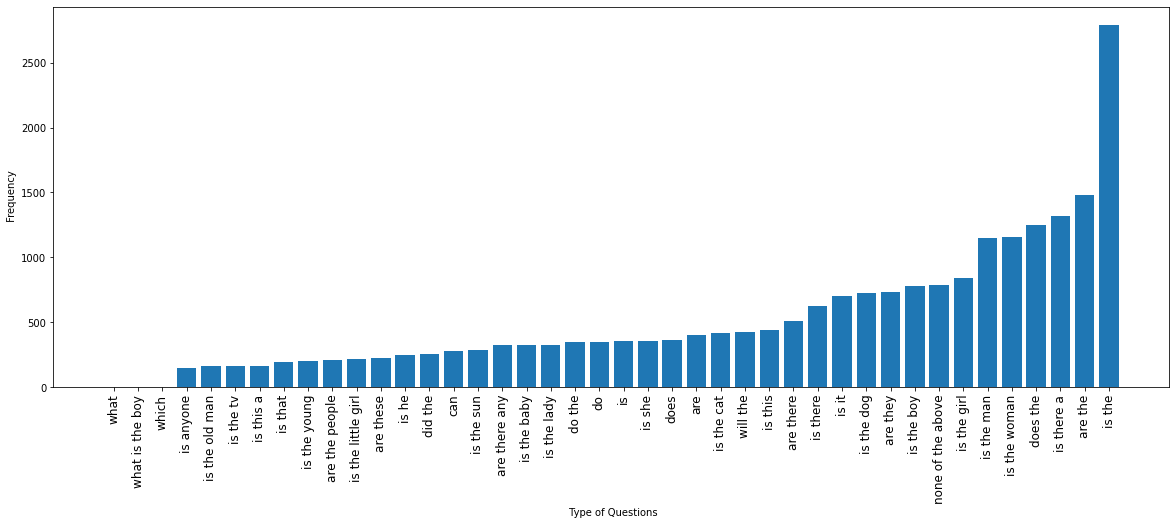

In [ ]:

fig, ax = plt.subplots(figsize=(20, 7))
ax.bar(df["Question type"], df["Frequency"], label ='Frequency')

# ax.set_ylabel('Frequency')

plt.xlabel(' Type of Questions')
plt.ylabel(' Frequency')

plt.xticks(rotation=90 ,fontsize=12)
plt.show()


this figure shows the distribution of questions based on the first four words of the questions for abstract scenes .
There exists a surprising variety of question types, including “is the boy . . .”, “Is there. . .”, “are they. . .”, and “Do the. . .”. this types of questions are typically answered using “yes” and “no” as answer.

##  Visualizing Image Dataset





In [ ]:
#list
!ls /content/scene_img_abstract_v002_train2017

Streaming output truncated to the last 5000 lines.
abstract_v002_train2015_000900103721.png
abstract_v002_train2015_000900103740.png
abstract_v002_train2015_000900103771.png
abstract_v002_train2015_000900103791.png
abstract_v002_train2015_000900103810.png
abstract_v002_train2015_000900103841.png
abstract_v002_train2015_000900103870.png
abstract_v002_train2015_000900103921.png
abstract_v002_train2015_000900103942.png
abstract_v002_train2015_000900103991.png
abstract_v002_train2015_000900103992.png
abstract_v002_train2015_000900104002.png
abstract_v002_train2015_000900104012.png
abstract_v002_train2015_000900104021.png
abstract_v002_train2015_000900104032.png
abstract_v002_train2015_000900104042.png
abstract_v002_train2015_000900104050.png
abstract_v002_train2015_000900104082.png
abstract_v002_train2015_000900104100.png
abstract_v002_train2015_000900104111.png
abstract_v002_train2015_000900104121.png
abstract_v002_train2015_000900104140.png
abstract_v002_train2015_000900104141.png
abstra

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir ):

   #setup the target directory (we'll view images from here)
   target_folder= target_dir 

   #get a random image path
   random_image= random.sample(os.listdir(target_folder) , 1 ) # 1 image
   print(random_image[0])

   # read in the image and plot it using matplotlib
   img= mpimg.imread(target_folder + "/" + random_image[0])  # ramdom_image return a list-->random_image[0] : string
   plt.imshow(img)
   plt.axis("off");

   print(f"image shape :{img.shape}") 
   return img




abstract_v002_train2015_000900171982.png
image shape :(400, 700, 4)


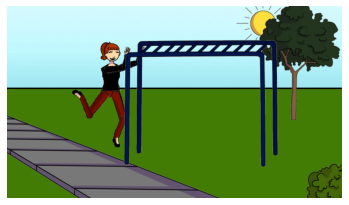

In [ ]:
image=view_random_image("/content/scene_img_abstract_v002_train2017")

In [ ]:
# View the image (actually just a big array/tensor)
image

array([[[0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        ...,
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ]],

       [[0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        ...,
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ]],

       [[0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        ...,
        [0.8352941 , 0.9843137 , 0.99607843, 1.        ],
        [0.8352941 , 0.984313

In [ ]:
# View the image shape
image.shape # returns (width, height, colour channels)

(400, 700, 4)

Looking at the image shape more closely, you'll see it's in the form (Width, Height, Colour Channels).

 the colour channels value is 4. because a CMYK image has four channels: cyan, magenta, yellow, and black.

### Image JSON Info File

In [ ]:
#list
!ls /content/scene_json_abstract_v002_binary_train2017/scene_composition_abstract_v002_binary_train2017


Streaming output truncated to the last 5000 lines.
abstract_v002_train2015_000900103721.json
abstract_v002_train2015_000900103740.json
abstract_v002_train2015_000900103771.json
abstract_v002_train2015_000900103791.json
abstract_v002_train2015_000900103810.json
abstract_v002_train2015_000900103841.json
abstract_v002_train2015_000900103870.json
abstract_v002_train2015_000900103921.json
abstract_v002_train2015_000900103942.json
abstract_v002_train2015_000900103991.json
abstract_v002_train2015_000900103992.json
abstract_v002_train2015_000900104002.json
abstract_v002_train2015_000900104012.json
abstract_v002_train2015_000900104021.json
abstract_v002_train2015_000900104032.json
abstract_v002_train2015_000900104042.json
abstract_v002_train2015_000900104050.json
abstract_v002_train2015_000900104082.json
abstract_v002_train2015_000900104100.json
abstract_v002_train2015_000900104111.json
abstract_v002_train2015_000900104121.json
abstract_v002_train2015_000900104140.json
abstract_v002_train2015_0

we create a function to choose a random json file

In [ ]:
train_img_info_path="/content/scene_json_abstract_v002_binary_train2017/scene_composition_abstract_v002_binary_train2017"

#read a random json file from train_img_info_path
def view_random_train_json_file(target_dir ):

   #setup the target directory (we'll view images from here)
   target_folder= target_dir 

   #get a random image path
   random_file= random.sample(os.listdir(target_folder) , 1 ) # 1 image
   #print(random_image)
   print(random_file[0])

   with open(target_dir+'/'+ random_file[0], 'r') as file:
     train_img_info_dict = json.load(file)

   return train_img_info_dict



In [ ]:
val_img_info_path="/content/scene_json_abstract_v002_binary_val2017/scene_composition_abstract_v002_binary_val2017"

#read a random json file from train_img_info_path
def view_random_val_json_file(target_dir ):

   #setup the target directory (we'll view images from here)
   target_folder= target_dir 

   #get a random image path
   random_file= random.sample(os.listdir(target_folder) , 1 ) # 1 image
   #print(random_image)
   print(random_file[0])

   with open(target_dir+'/'+ random_file[0], 'r') as file:
     val_img_info_dict = json.load(file)

   return val_img_info_dict

In [ ]:
val_info_dict=view_random_val_json_file(train_img_info_path)
val_info_dict

abstract_v002_train2015_000900102201.json


{'file_name': 'abstract_v002_train2015_000900102201.png',
 'id': 900102201,
 'scene': {'availableObject': [{'instance': [{'deformable': False,
      'depth0': 0,
      'depth1': 5,
      'flip': 0,
      'instanceID': 0,
      'name': 'Duck02',
      'numPose': 4,
      'poseID': 0,
      'present': True,
      'type': 'animal',
      'x': 497,
      'y': 266,
      'z': 2},
     {'deformable': False,
      'depth0': 0,
      'depth1': 5,
      'flip': 0,
      'instanceID': 1,
      'name': 'Duck02',
      'numPose': 4,
      'poseID': 2,
      'present': True,
      'type': 'animal',
      'x': 645,
      'y': 292,
      'z': 2},
     {'deformable': False,
      'depth0': 0,
      'depth1': 5,
      'flip': 0,
      'instanceID': 2,
      'name': 'Duck02',
      'numPose': 4,
      'poseID': 0,
      'present': False,
      'type': 'animal',
      'x': 0,
      'y': 0,
      'z': 2},
     {'deformable': False,
      'depth0': 0,
      'depth1': 5,
      'flip': 1,
      'instanceID':

In [ ]:
info_dict=view_random_train_json_file(train_img_info_path)
info_dict

abstract_v002_train2015_000900109541.json


{'file_name': 'abstract_v002_train2015_000900109541.png',
 'id': 900109541,
 'scene': {'availableObject': [{'instance': [{'body': [{'childX': 56,
        'childY': 118,
        'clickTransfer': 'null',
        'handleRadius': 30,
        'initPose': [0, 0, 0, 0, 0, -0.44, 0.12, 0.12, 0.015],
        'parent': 'null',
        'parentX': -1,
        'parentY': -1,
        'part': 'Torso'},
       {'childX': 48,
        'childY': 102,
        'clickTransfer': 'null',
        'handleRadius': 20,
        'initPose': [0, 0, 0, 0, 0, 0, 0, 0, 0],
        'parent': 'Torso',
        'parentX': 58,
        'parentY': 13,
        'part': 'Head'},
       {'childX': 62,
        'childY': 51,
        'clickTransfer': 'Head',
        'handleRadius': 0,
        'initPose': [0, 0, 0, 0, 0, 0, 0, 0, 0],
        'parent': 'Head',
        'parentX': 64,
        'parentY': 25,
        'part': 'Hair'},
       {'childX': 30,
        'childY': 18,
        'clickTransfer': 'null',
        'handleRadius': 15,
 

In [ ]:
info_dict["file_name"] ,info_dict["id"]

('abstract_v002_train2015_000900118460.png', 900118460)

now we obtain the id and the file name of an train image  from a random json file, so let's plot it.

In [ ]:
def plot_train_image(image_name) :

   # read in the image and plot it using matplotlib
   target_folder="/content/scene_img_abstract_v002_train2017"
   img= mpimg.imread(target_folder + "/" + image_name) 
   plt.imshow(img)
   plt.axis("off");

   print(f"image shape :{img.shape}") #show the shape of the image

   return img


image shape :(400, 700, 4)


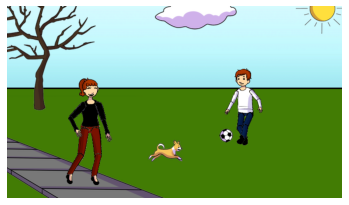

In [ ]:
train_img=plot_train_image(info_dict["file_name"])


and we do the same for validation json file.

In [ ]:
!ls /content/scene_json_abstract_v002_binary_val2017/scene_composition_abstract_v002_binary_val2017

abstract_v002_val2015_000000020001.json
abstract_v002_val2015_000000020002.json
abstract_v002_val2015_000000020004.json
abstract_v002_val2015_000000020005.json
abstract_v002_val2015_000000020009.json
abstract_v002_val2015_000000020010.json
abstract_v002_val2015_000000020012.json
abstract_v002_val2015_000000020016.json
abstract_v002_val2015_000000020021.json
abstract_v002_val2015_000000020022.json
abstract_v002_val2015_000000020023.json
abstract_v002_val2015_000000020025.json
abstract_v002_val2015_000000020028.json
abstract_v002_val2015_000000020029.json
abstract_v002_val2015_000000020031.json
abstract_v002_val2015_000000020032.json
abstract_v002_val2015_000000020033.json
abstract_v002_val2015_000000020034.json
abstract_v002_val2015_000000020035.json
abstract_v002_val2015_000000020038.json
abstract_v002_val2015_000000020040.json
abstract_v002_val2015_000000020041.json
abstract_v002_val2015_000000020043.json
abstract_v002_val2015_000000020044.json
abstract_v002_val2015_000000020045.json


In [ ]:
val_img_info_path="/content/scene_json_abstract_v002_binary_val2017/scene_composition_abstract_v002_binary_val2017"

info_val_img_dict=view_random_val_json_file(val_img_info_path)
info_val_img_dict["file_name"] ,info_val_img_dict["id"]

abstract_v002_val2015_000000025823.json


('abstract_v002_val2015_000000025823.png', 25823)

In [ ]:
def plot_val_image(image_name) :

   # read in the image and plot it using matplotlib
   target_folder="/content/scene_img_abstract_v002_val2017"
   img= mpimg.imread(target_folder + "/" + image_name) 
   plt.imshow(img)
   plt.axis("off");

   print(f"image shape :{img.shape}") #show the shape of the image

   return img

image shape :(400, 700, 4)


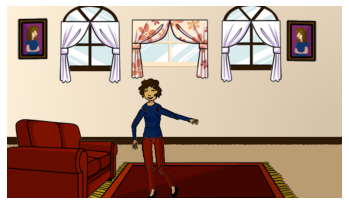

In [ ]:
val_img=plot_val_image(info_val_img_dict["file_name"])

In [ ]:
#a way to find out how many images are in a file
num_val_img=len(os.listdir("/content/scene_img_abstract_v002_val2017"))
num_val_json=len(os.listdir("/content/scene_json_abstract_v002_binary_val2017/scene_composition_abstract_v002_binary_val2017"))

num_val_img , num_val_json

(10696, 10696)

## **Plotting** a random data



In [ ]:
question_dict=[]
answer_list=[]

for item in train_question_dict["questions"] :
    if item["image_id"]==87 :
        question_dict.append(item)
    
print("question list : ")
for x in  range(len(question_dict)):
    print(question_dict[x])

for item in train_annotation_dict["annotations"] :
    if item["image_id"]==87:
        answer_list.append(item)

print("answer list : ")
for x in  range(len(answer_list)):
    print(answer_list[x])
  

question list : 
{'image_id': 87, 'question': 'Is the boy having wine?', 'question_id': 870}
{'image_id': 87, 'question': 'Is the cat facing the boy?', 'question_id': 872}
{'image_id': 87, 'question': 'Is there an adult?', 'question_id': 871}
answer list : 
{'question_type': 'is the boy', 'multiple_choice_answer': 'yes', 'answers': [{'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 1}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 2}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 3}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 5}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 7}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 8}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 9}, {'answer': 'yes', 'answer_confidence': 'yes', 'answer_id': 10}], 'image_id': 87, 'answer_type': 'ye

In [ ]:
import random

def random_val_data():
  #plot random val image
  val_img_info_path="/content/scene_json_abstract_v002_binary_val2017/scene_composition_abstract_v002_binary_val2017"
  question_list=[]
  answer_list=[]

  info_val_img_dict=view_random_val_json_file(val_img_info_path)
  img_file_name=info_val_img_dict["file_name"] 
  img_id=info_val_img_dict["id"]

  img=plot_val_image(img_file_name)

  # question
  for item in val_question_dict["questions"] :
    if item["image_id"]==img_id :
        question_list.append(item)
    
  print("question list : ")
  for x in  range(len(question_list)):
    print(question_list[x])

  # annotation
  for item in val_annotation_dict["annotations"] :
    if item["image_id"]==img_id:
        answer_list.append(item)

  print("answer list : ")
  for x in  range(len(answer_list)):
    print(answer_list[x])

  return (val_img ,question_list, answer_list)



abstract_v002_val2015_000000028737.json
image shape :(400, 700, 4)
question list : 
{'image_id': 28737, 'question': 'Are the two people on the blanket making love?', 'question_id': 287371}
{'image_id': 28737, 'question': 'Are they looking at the clouds?', 'question_id': 287372}
answer list : 
{'question_type': 'are the', 'multiple_choice_answer': 'no', 'answers': [{'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 1}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 2}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 3}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 5}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 7}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 8}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 9}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 10}], 'image_id':

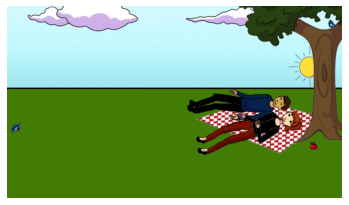

In [ ]:
img,quest_dict,ans_dict=random_val_data()

In [ ]:
import random

def random_train_data():
  #plot random val image
  train_img_info_path="/content/scene_json_abstract_v002_binary_train2017/scene_composition_abstract_v002_binary_train2017"
  
  question_list=[]
  answer_list=[]
 
  info_train_img_dict=view_random_train_json_file(train_img_info_path)
  img_file_name=info_train_img_dict["file_name"] 
  img_id=info_train_img_dict["id"]
   
  img=plot_train_image(img_file_name)

  #print question

  for item in train_question_dict["questions"] :
    if item["image_id"]==img_id:
        question_list.append(item)
    
  print("question list : ")
  for x in  range(len(question_list)):
    print(question_list[x])

  # annotation
  for item in train_annotation_dict["annotations"] :
    if item["image_id"]==img_id:
        answer_list.append(item)

  print("answer list : ")
  for x in  range(len(answer_list)):
    print(answer_list[x])

  return (val_img ,question_list, answer_list)



abstract_v002_train2015_000000015507.json
image shape :(400, 700, 4)
question list : 
{'image_id': 15507, 'question': 'Are the chairs sitting side by side?', 'question_id': 155072}
{'image_id': 15507, 'question': 'Is the girl with red hair laughing?', 'question_id': 155071}
answer list : 
{'question_type': 'are the', 'multiple_choice_answer': 'no', 'answers': [{'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 1}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 2}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 3}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 4}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 5}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 6}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 7}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 8}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 9}, {'answer': 'no', 'answer_confidence': 'yes', 'answer_id': 10}], 'image_id': 155

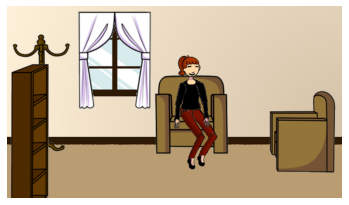

In [ ]:
train_img, train_quest_dict, train_ans_dict = random_train_data()

# **Step 1**: Creating VQA raw data as a json file

In [ ]:
import os
import json

def  get_question(dict ,image_id):
  
  list=[]
  for item in dict["questions"] :
    if item["image_id"]==image_id:
        list.append(item)
  return list

def  get_answer(dict,question_id):
  
  list=[]
  for item in dict["annotations"] :
    if item["question_id"]==question_id:
        list.append(item)
  return list

def get_unique_data(json_path , img_path):
  unique_annotation=[]
  unique_question=[]
  unique_question_type=[]
  unique_image_id=[]
  unique_image_name=[]
  unique_question_id=[]
  unique_answer=[]
  data=[]
  
  img_info_path=json_path
  jsonfile_list=os.listdir(img_info_path)

  for json_file in jsonfile_list:
    with open(img_info_path+'/'+json_file, 'r') as file:
      train_img_info_dict = json.load(file)
    unique_image_id.append(train_img_info_dict["id"])
    unique_image_name.append(train_img_info_dict["file_name"])
  
  for i in unique_image_id:
    list= get_question(train_question_dict,i)
    unique_question_id.append(list[0]["question_id"])
    unique_question.append(list[0]["question"])
  

  for i in unique_question_id:
    list=get_answer(train_annotation_dict,i)
    unique_answer.append(list[0]["multiple_choice_answer"])
    unique_question_type.append(list[0]["question_type"])


  for i in range(0, len(unique_image_name)):
    dict={}
    dict["img_path"]=  img_path + unique_image_name[i]
    # dict["img_id"]=unique_image_id[i]
    dict["type"]=unique_question_type[i]
    dict["ques_id"]=unique_question_id[i]
    dict["question"]=unique_question[i]
    dict["MC_ans"]=unique_answer[i]
    data.append(dict)


  return(data)
  

In [ ]:
train_img_path="/content/scene_img_abstract_v002_train2017/"
train_json_path="/content/scene_json_abstract_v002_binary_train2017/scene_composition_abstract_v002_binary_train2017"

train_data=get_unique_data(train_json_path , train_img_path)

In [ ]:
json_files_val_path="/content/scene_json_abstract_v002_binary_val2017/scene_composition_abstract_v002_binary_val2017"
img_path="/content/scene_img_abstract_v002_val2017/"

def get_unique_val_data(json_val_path):
  unique_annotation=[]
  unique_question=[]
  unique_image_id=[]
  unique_image_name=[]
  unique_question_id=[]
  unique_answer=[]
  unique_question_type=[]

  data=[]

  val_img_info_path=json_val_path

  jsonfile_list=os.listdir(val_img_info_path)

  for json_file in jsonfile_list:
    with open(val_img_info_path+'/'+json_file, 'r') as file:
      val_img_info_dict = json.load(file)
    unique_image_id.append(val_img_info_dict["id"])
    unique_image_name.append(val_img_info_dict["file_name"])
  
  for i in unique_image_id:
    list= get_question(val_question_dict,i)
    unique_question_id.append(list[0]["question_id"])
    unique_question.append(list[0]["question"])

  for i in unique_question_id:
    list=get_answer(val_annotation_dict,i)
    unique_answer.append(list[0]["multiple_choice_answer"])
    unique_question_type.append(list[0]["question_type"])

  for i in range(0, len(unique_image_name)):
      dict={}
      dict["img_path"]=  img_path + unique_image_name[i]
      # dict["img_id"]=unique_image_id[i]
      dict["type"]=unique_question_type[i]
      dict["ques_id"]=unique_question_id[i]
      dict["question"]=unique_question[i]
      dict["MC_ans"]=unique_answer[i]
      data.append(dict)


  return(data)
  

In [ ]:
val_data=get_unique_val_data(json_files_val_path)

In [ ]:
val_data[0]

{'img_path': '/content/scene_img_abstract_v002_val2017/abstract_v002_val2015_000900261381.png',
 'type': 'is the sun',
 'ques_id': 900261381,
 'question': 'Is the sun completely visible?',
 'MC_ans': 'yes'}

In [ ]:
len(train_data) ,len(val_data)

(20629, 10696)

In [ ]:
json.dump(train_data, open("train_data.json",'w'))
json.dump(val_data, open("val_data.json",'w'))

 # **Step 2** : Preprocessing Image



In [ ]:
import numpy as np
import h5py 
import json

In [ ]:
with open('/content/gdrive/MyDrive/Maria/train_data.json', 'r') as f:
  train_data= json.load(f)

with open('/content/gdrive/MyDrive/Maria/val_data.json', 'r') as f:
  val_data= json.load(f)

In [ ]:
train_data[10]

{'img_path': '/content/scene_img_abstract_v002_train2017/abstract_v002_train2015_000900100292.png',
 'type': 'are the',
 'ques_id': 900100292,
 'question': 'Are the boys twins?',
 'MC_ans': 'no'}

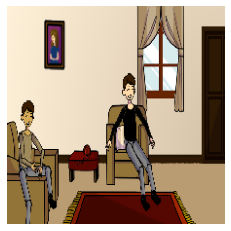

In [ ]:
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = load_img( train_data[10]["img_path"] , target_size=(224,224))
plt.imshow(img)
plt.axis("off");

In [ ]:
train_img_list=[]
train_quest=[]
train_ans=[]

for dict in train_data:
  train_img_list.append(dict["img_path"])
  train_quest.append(dict["question"].replace("?",""))
  train_ans.append(dict["MC_ans"])

In [ ]:
val_img_list=[]
val_quest=[]
val_ans=[]

for dict in val_data:
  val_img_list.append(dict["img_path"])
  val_quest.append(dict["question"].replace("?",""))
  val_ans.append(dict["MC_ans"])

In [ ]:
import numpy as np
import os
from keras.preprocessing import image
from keras.applications.vgg19 import VGG19
from keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
def load_img(img_name):
  im = image.load_img(img_name, target_size=(224,224))
  im = image.img_to_array(im)
  datagen = ImageDataGenerator(rescale=1./255 )
  im=datagen.apply_transform(x=im,
                            transform_parameters={'theta':40, 'brightness':0.8, 'zx':0.9, 'zy':0.9})
  im = np.expand_dims(im, axis=0)
  im = preprocess_input(im)
  return im

In [ ]:
# take the output features from the last pooling layer
model = VGG19(include_top=False, weights='imagenet', input_tensor=None)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
features_train = []

for img_name in train_img_list:
  ims = []
  im = load_img(os.path.join( img_name))
  ims.append(im)
  features_train.extend(model.predict(np.vstack(ims)))

In [ ]:
features_train=np.array(features_train).astype('float32')

In [ ]:
y=[]
for ans in train_ans:
  if  ans=="no":
   x=0
  elif ans=="yes":
    x=1
  y.append(x)

In [ ]:
y=np.array(y).astype('float32')

In [ ]:
features_val = []

for img_name in val_img_list:
  ims = []
  im = load_img(os.path.join( img_name))
  ims.append(im)
  features_val.extend(model.predict(np.vstack(ims)))

In [ ]:
features_val=np.array(features_val).astype('float32')

In [ ]:
y_val=[]
for ans in val_ans:
  if  ans=="no":
   x=0
  elif ans=="yes":
    x=1
  y_val.append(x)

In [ ]:
y_val=np.array(y_val).astype('float32')

In [ ]:
# create output h5 file for training set.
f = h5py.File('vqa_train_feature.h5', "w")
f.create_dataset("features_train", dtype='float32', data=features_train)
f.close()

In [ ]:
# create output h5 file for validation set.
f = h5py.File('vqa_val_feature.h5', "w")
f.create_dataset("features_val", dtype='float32', data=features_val)
f.close()

In [ ]:
# read hf5
import h5py

train_feat = h5py.File('/content/vqa_train_feature.h5', 'r')
features_train = train_feat.get('/features_train')[:]

val_feat = h5py.File('/content/vqa_val_feature.h5', 'r')
features_val = val_feat.get('/features_val') [:]


# **Step 3** : Tokenization

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

max_vocab_length = 1000 # max number of words to have in our vocabulary
max_length = 26 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_quest)
text_vectorizer.adapt(val_quest)

In [ ]:
token_train=text_vectorizer(train_quest)
token_val=text_vectorizer(val_quest)

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                              output_dim=256, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length# how long is each input
                            ) 

In [ ]:
# Get the unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5] # most common tokens (notice the [UNK] token for "unknown" words)
bottom_5_words = words_in_vocab[-5:] # least common tokens

print(f"Number of words in vocab: {len(words_in_vocab)}")
print(f"Top 5 most common words: {top_5_words}") 
print(f"Bottom 5 least common words: {bottom_5_words}")

Number of words in vocab: 1000
Top 5 most common words: ['', '[UNK]', 'the', 'is', 'a']
Bottom 5 least common words: ['bad', 'available', 'attempting', 'approach', 'apart']


In [ ]:
train_X=[token_train.numpy(),features_train]
train_Y = y

test_X=[token_val.numpy(),features_val]
test_Y = y_val

# **Step 4** : Modelling

In [ ]:
from keras.models import Sequential
from keras.layers.core import Reshape, Activation, Dropout
from keras.layers import *
from keras.callbacks import EarlyStopping

In [ ]:
def model_A():
    model_image = Sequential()
    
    model_image.add(Input(shape=(7, 7, 512)))
    model_image.add(GlobalAveragePooling2D())
    # model_image.add(Flatten())
    
    model_image.add(Dense(2048))
    # model_image.add(Dense(128))
    model_image.add(BatchNormalization())

    model_image.add(Dense(1024))
    # model_image.add(Dense(64))
    model_image.add(BatchNormalization())

    model_image.add(Activation("relu"))
    model_image.add(Dropout(0.5))
    
    return model_image

In [ ]:
a=model_A()

In [ ]:
a.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 global_average_pooling2d (G  (None, 512)              0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 2048)              1050624   
                                                                 
 batch_normalization (BatchN  (None, 2048)             8192      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 batch_normalization_1 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                        

In [ ]:
def model_B():
  inputs = Input(shape=(26)) 
  x=embedding(inputs)

  # x=LSTM(128, return_sequences=True)(x)
  x=LSTM(256, return_sequences=True)(x)
  x=LSTM(256, return_sequences=False)(x)
  x=Dense(1024)(x)
  # x=Dense(64)(x)

  x=BatchNormalization()(x)
  x=Activation("relu")(x)
  outputs= Dropout(0.5)(x)

  model = tf.keras.Model(inputs, outputs) 
  return model

In [ ]:
b=model_B()

In [ ]:
b.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 26)]              0         
                                                                 
 embedding (Embedding)       (None, 26, 256)           256000    
                                                                 
 lstm (LSTM)                 (None, 26, 256)           525312    
                                                                 
 lstm_1 (LSTM)               (None, 256)               525312    
                                                                 
 dense_2 (Dense)             (None, 1024)              263168    
                                                                 
 batch_normalization_2 (Batc  (None, 1024)             4096      
 hNormalization)                                                 
                                                             

In [ ]:
from keras.models import Model
import tensorflow as tf

def model_C(model_B ,model_A,lr) :

  # concat=Multiply()([model_B.output, model_A.output] )   
  # concat=Average()([model_B.output, model_A.output] ) 
  concat=Add()([model_B.output, model_A.output] ) 
  y=BatchNormalization()(concat)

  y=Dense(256)(y)
  # y=Dense(64)(y)
  y=Activation("relu")(y)
  y=BatchNormalization()(y)
  y=Dropout(0.5)(y)

  y=Dense(64)(y)
  y=Activation("relu")(y)
  y=BatchNormalization()(y)
  y=Dropout(0.5)(y)

  output=Dense(1, activation='sigmoid')(y)
  model=Model([model_B.input, model_A.input],output)

  opt = tf.keras.optimizers.Adam(lr) 
  model.compile(loss='binary_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])

  return model

In [ ]:
lr=0.01
c=model_C(b ,a , lr)

In [ ]:
c.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 26)]         0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 7, 7, 512)]  0           []                               
                                                                                                  
 embedding (Embedding)          (None, 26, 256)      256000      ['input_3[0][0]']                
                                                                                                  
 global_average_pooling2d (Glob  (None, 512)         0           ['input_2[0][0]']                
 alAveragePooling2D)                                                                        

In [ ]:
np.random.seed(42)

history = c.fit(train_X, 
                train_Y, 
                batch_size = 512,
                epochs=250 ,
                validation_data=(test_X, test_Y)  
                    )

Epoch 1/250
41/41 [==============================] - 12s 122ms/step - loss: 0.7612 - accuracy: 0.5080 - val_loss: 1.6424 - val_accuracy: 0.5123
Epoch 2/250
41/41 [==============================] - 3s 71ms/step - loss: 0.6955 - accuracy: 0.5101 - val_loss: 0.8059 - val_accuracy: 0.4858
Epoch 3/250
41/41 [==============================] - 3s 71ms/step - loss: 0.6954 - accuracy: 0.5096 - val_loss: 0.7118 - val_accuracy: 0.4965
Epoch 4/250
41/41 [==============================] - 3s 70ms/step - loss: 0.6969 - accuracy: 0.4994 - val_loss: 0.6971 - val_accuracy: 0.4867
Epoch 5/250
41/41 [==============================] - 3s 71ms/step - loss: 0.6950 - accuracy: 0.5121 - val_loss: 0.6998 - val_accuracy: 0.5069
Epoch 6/250
41/41 [==============================] - 3s 71ms/step - loss: 0.6964 - accuracy: 0.5017 - val_loss: 0.6954 - val_accuracy: 0.5113
Epoch 7/250
41/41 [==============================] - 3s 70ms/step - loss: 0.6940 - accuracy: 0.5085 - val_loss: 0.6941 - val_accuracy: 0.5129
Epoc

Text(0, 0.5, 'Accuracy')

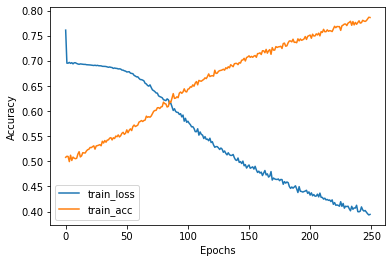

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['accuracy'], label='train_acc')
plt.legend(loc='best')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')

### evaluate the model

In [ ]:
score = c.evaluate(test_X, test_Y, verbose = 0) 
print(score)

[1.1039385795593262, 0.502991795539856]


# **Step 5** : Make some prediction

In [ ]:
prediction=c.predict(test_X)
prediction

array([[7.69930959e-01],
       [4.98253047e-01],
       [6.99409647e-05],
       ...,
       [4.35081512e-01],
       [5.52429080e-01],
       [1.08446494e-01]], dtype=float32)

In [ ]:
round(prediction[1][0])

Text(0.5, 1.0, 'question : Is the kids eating pie?\n answer :no\n Prediction :1')

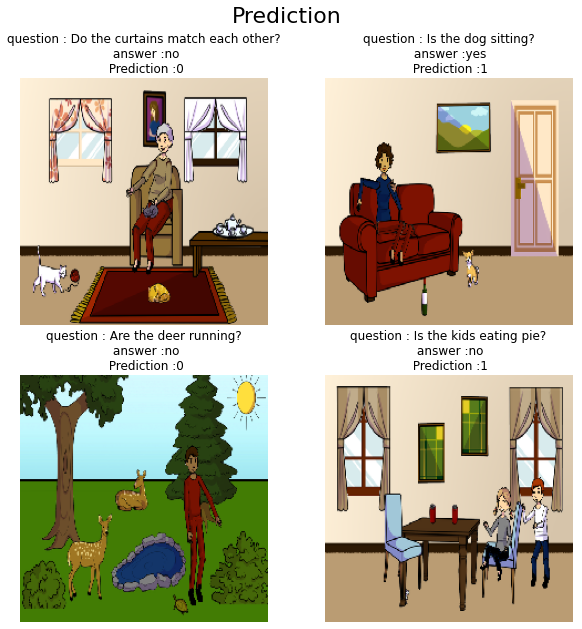

In [ ]:
import matplotlib.pyplot as plt
from keras.preprocessing.image import  load_img


fig = plt.figure(figsize=(10,10))
plt.axis("off")
fig.suptitle('Prediction' , fontsize=22 )


ax1 = fig.add_subplot(2,2,1)
img1 = load_img(val_data[1]["img_path"], target_size=(224,224))
ax1.imshow(img1)
ax1.axis("off")
ax1.set_title('question : '+ val_data[1]["question"] + "\n answer :" + val_data[1]["MC_ans"] +"\n Prediction :" + str(round(prediction[1][0])) ) 
    
  
ax2 = fig.add_subplot(2,2,2)
img2 = load_img(val_data[15]["img_path"], target_size=(224,224))
ax2.imshow(img2)
ax2.axis("off")
ax2.set_title('question : '+ val_data[15]["question"] + "\n answer :" + val_data[15]["MC_ans"] +"\n Prediction :" + str(round(prediction[15][0])) ) 


ax3 = fig.add_subplot(2,2,3)
img3 = load_img(val_data[10]["img_path"], target_size=(224,224))
ax3.imshow(img3)
ax3.axis("off")
ax3.set_title('question : '+ val_data[10]["question"] + "\n answer :" + val_data[10]["MC_ans"] +"\n Prediction :" + str(round(prediction[10][0])) ) 


ax4 = fig.add_subplot(2,2,4)
img4 = load_img(val_data[105]["img_path"], target_size=(224,224))
ax4.imshow(img4)
ax4.axis("off")
ax4.set_title('question : '+ val_data[105]["question"] + "\n answer :" + val_data[105]["MC_ans"] +"\n Prediction :" + str(round(prediction[105][0])) ) 
   